In [2]:
import pandas as pd 
import seaborn as sns 
from statsmodels.formula.api import ols 

df = pd.read_csv("marketing_sales.csv")
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


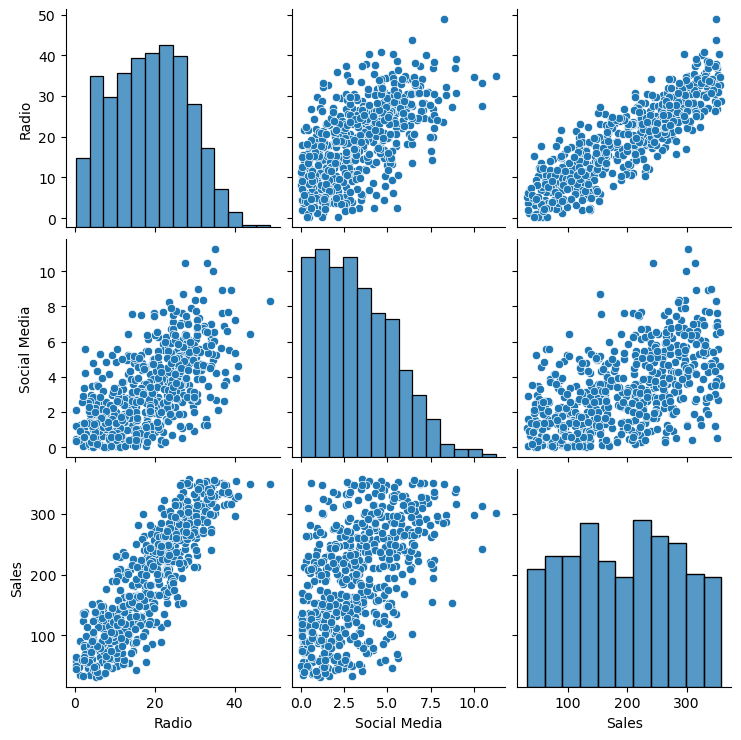

In [3]:
sns.pairplot(df)

In [4]:
## Training model 

ols_formula = 'Sales ~ Radio'
OLS =  ols(formula = ols_formula, data = df)
model = OLS.fit()


In [9]:
## Model error
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1781.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          2.96e-177
Time:                        10:35:21   Log-Likelihood:                -2971.5
No. Observations:                 570   AIC:                             5947.
Df Residuals:                     568   BIC:                             5956.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4488      4.061     10.206      0.000      33.472      49.426
Radio          8.1799      0.194     42.206      0.000       7.799       8.561
==============================================================================
Omnibus:                        2.272   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                2.236
Skew:                          -0.105   Prob(JB):                        0.327
Kurtosis:                       2.776   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Using sklearn Library 

In [10]:
# Necessary Library 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# loading data
df = pd.read_csv('marketing_sales.csv')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [4]:
# Data cleaning
df.isnull().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
# splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(df[['Radio']], df['Sales'], test_size=0.2, random_state=1)


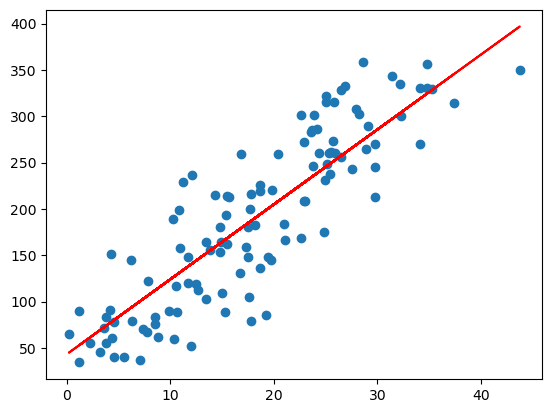

In [15]:
# MODEL initalization 
model = LinearRegression()

# model training
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# visualizing model 
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, 'r')
plt.show()

In [16]:
# model evaluation 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse: {mse}")
print(f"r2: {r2}")

mse: 2045.5670919904887
r2: 0.7589832972891906


# Improving model accuracy 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("marketing_sales.csv")
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [3]:
# Cleaning null data
print(df[df.isnull().any(axis = 1)])
df.dropna(inplace = True)

       TV      Radio  Social Media Influencer       Sales
232   NaN  34.111674      4.624148       Nano  342.913372
443  High  36.466753      5.635992       Mega         NaN
510   Low        NaN      4.132526      Macro   78.031498


<Axes: ylabel='Radio'>

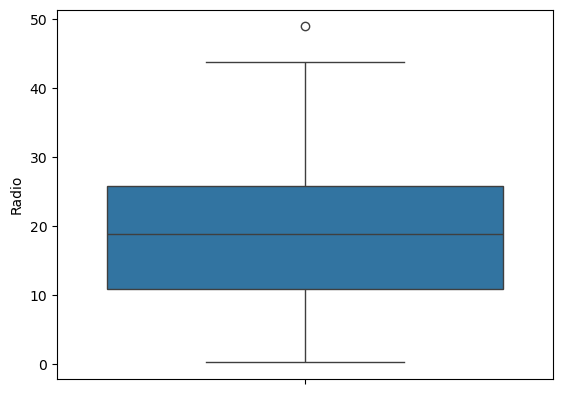

In [4]:
# visualizing 
sns.boxplot(df['Radio'])

In [11]:
# cleaning data with zscore > 1 and zscore < 1
df['zscore_Radio'] = (df['Radio'] - df['Radio'].mean()) / df['Radio'].std()
len(df[(df['zscore_Radio'] > 1) | (df['zscore_Radio'] < 1)])

569